Handling outliers with Pandas

Visualization Techniques

1. Box Plot

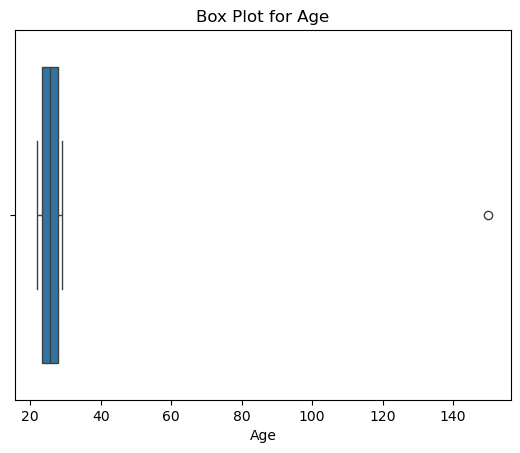

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = {'Age': [22, 25, 28, 24, 23, 29, 150, 27, 26, 22]}
df = pd.DataFrame(data)

sns.boxplot(x=df['Age'])
plt.title("Box Plot for Age")
plt.show()

2. Scatter Plot

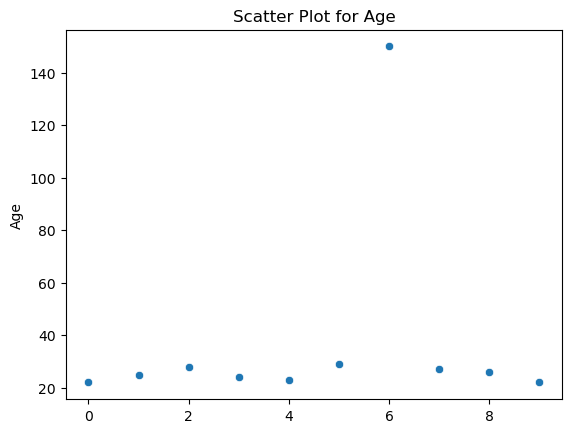

In [8]:
sns.scatterplot(x=range(len(df['Age'])), y=df['Age'])
plt.title("Scatter Plot for Age")
plt.show()

3. Histogram

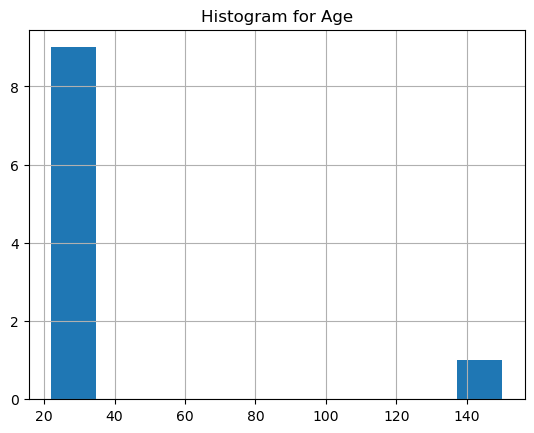

In [11]:
df['Age'].hist(bins=10)
plt.title("Histogram for Age")
plt.show()

Statistical Methods

In [14]:
from scipy import stats
import numpy as np
import pandas as pd

data = {'Age': [22, 25, 28, 24, 23, 29, 150, 27, 26, 22]}
df = pd.DataFrame(data)

z = np.abs(stats.zscore(df['Age']))
print("Z-Score Values:\n", z)

outliers = df[z > 3]
print("Outliers:\n", outliers)

Z-Score Values:
 [0.41558794 0.33566718 0.25574643 0.36230744 0.38894769 0.22910617
 2.9943644  0.28238668 0.30902693 0.41558794]
Outliers:
 Empty DataFrame
Columns: [Age]
Index: []


2. Interquartile Range (IQR) Method

In [17]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print("Outliers:\n")
outliers

Outliers:



,Age
6,150


How to Handle Outliers?

In [20]:
df_cleaned = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]
print("Cleaned Data:\n", df_cleaned)

Cleaned Data:
    Age
0   22
1   25
2   28
3   24
4   23
5   29
7   27
8   26
9   22


2. Replacing Outliers

In [23]:
df['Age'] = np.where((df['Age'] < lower_bound) | (df['Age'] > upper_bound), df['Age'].median(), df['Age'])
print("Data after Replacing Outliers:\n", df)

Data after Replacing Outliers:
     Age
0  22.0
1  25.0
2  28.0
3  24.0
4  23.0
5  29.0
6  25.5
7  27.0
8  26.0
9  22.0


3. Capping Outliers

In [26]:
df['Age'] = np.clip(df['Age'], lower_bound, upper_bound)
print("Data after Capping Outliers:\n", df)

Data after Capping Outliers:
     Age
0  22.0
1  25.0
2  28.0
3  24.0
4  23.0
5  29.0
6  25.5
7  27.0
8  26.0
9  22.0
